# Real Disposable Income and Savings
Given that personal consumption expenditures make up about 67.6% of US GDP it is interesting to analyze dynamics in the disposable personal income of US residents and their savings rate. 

Throughout this notebook I use real measures (i.e. chained US dollars) and ratios. Given a large time period I analize in this notebook&mdash;from 1959 onwards &mdash;I work with a quarterly data frequency for better visualizations rather than monthly.

### Terminology
* **Personal income**: All income of an individual from labor, rentals, investments, etc, as well as government social benefits net of employer contributions for government social insurance. For owner-occupied dwellings the imputed rental value (from renting to themselves) is also added net of mortgage interest paid. At the same time this imputed rental value is also included in personal consumption expenditures.
* **Disposable personal income**: `Personal income`<sup>1</sup> - `Taxes`
* **Personal savings**: `Disposable personal income` - `Personal consumption expenditures` - `Interest payments` - `Current transfer payments`. Interest payments are mostly payments on credit cards and personal loans (not mortgage interest payments). Current transfer payments include transfers to and from the government. Personal consumption expenditure also includes money spent on renting (for tenant-occupied housing) and imputed rent (for owner-occupied housing). The latter effectively cancells out the artificial increase of personal income by the imputed rental value.

[1] Mortgage interest payments are accounted for in `Personal income` under the category _Rental income of persons_. Therefore higher mortgage interest payments for households owning a home lead to smaller Disposable Personal Income.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import pandas_datareader.data as web

from datetime import date

In [2]:
report_start = date.fromisoformat('1959-01-01')
report_end = date.today()

In [3]:
MEAN_LEVEL_OF = 'Mean level of '
TAX_TO_INCOME = 'Taxes to Income'
PSR = 'Personal Saving Rate'
INTEREST_PAYMENTS_TO_DPI = 'Interest payments to Disposable personal income'
PCE_TO_DPI = 'Personal consumption to Disposable personal income'
MORTGAGE_DEBT_SERVICE_TO_DPI = 'Mortgage Debt Service Payments to Disposable Personal Income'
SOCIAL_BENEFITS_TO_DISPOSABLE_INCOME = 'Net contribution of Government to Disposable income'
MEAN_LEVEL_OF_SOCIAL_BENEFITS_TO_DISPOSABLE_INCOME = MEAN_LEVEL_OF + SOCIAL_BENEFITS_TO_DISPOSABLE_INCOME
REAL_DISPOSABLE_INCOME = 'Real Disposable Personal Income per Capita'
REAL_DISPOSABLE_INCOME_GROWTH_GRAPH_TITLE = REAL_DISPOSABLE_INCOME + ', Annual Growth Rate'
SAVINGS_RATE_GRAPH_TITLE = 'Personal saving as a percentage of disposable personal income'
MEAN_LEVEL_OF_SAVINGS_RATE = MEAN_LEVEL_OF + 'Savings rate'
MEAN_LEVEL_OF_INTEREST_PAYMENTS_TO_DPI = MEAN_LEVEL_OF + INTEREST_PAYMENTS_TO_DPI
MEAN_LEVEL_OF_REAL_DISPOSABLE_INCOME_GROWTH = MEAN_LEVEL_OF + REAL_DISPOSABLE_INCOME_GROWTH_GRAPH_TITLE

In [4]:
data = web.get_data_fred(['A229RX0', 'PSAVERT', 'PI', 'B039RC1M027SBEA', 'W055RC1', 'A063RC1', 'A061RC1', 'DSPI',
                          'B069RC1', 'PCE', 'W062RC1M027SBEA'], report_start, report_end)

data[TAX_TO_INCOME] = (data.W055RC1 + data.W062RC1M027SBEA) / data.PI

# data.W062RC1M027SBEA covers donations, fees and fines to the government. Strictly speaking it subtracts from
# the savings rate rather than disposable income so I don't subtract it.
data[SOCIAL_BENEFITS_TO_DISPOSABLE_INCOME] = (data.A063RC1 - data.A061RC1 - data.W055RC1 - data.B039RC1M027SBEA)\
                                             / data.DSPI
data.PSAVERT /= 100.
data[INTEREST_PAYMENTS_TO_DPI] = data.B069RC1 / data.DSPI
data[PCE_TO_DPI] = data.PCE / data.DSPI

data.rename(columns={'A229RX0': REAL_DISPOSABLE_INCOME,
                     'PSAVERT': PSR, 'PI': 'Personal Income',
                     'B039RC1M027SBEA': 'Employer contributions for government social insurance',
                     'W055RC1': 'Personal current taxes',
                     'A063RC1': 'Government social benefits to persons',
                     'A061RC1': 'Contributions for government social insurance',
                     'DSPI': 'Disposable Personal Income',
                     'B069RC1': 'Personal interest payments',
                     'PCE': 'Personal Consumption Expenditures',
                     'W062RC1M027SBEA': 'Current transfers to government'
                     }, inplace=True)

# Resampling to quarterly frequencies using the same approach as the BEA -- taking a mean over
# seasonally adjusted monthly numbers
data_quarterly = data.resample('QS').mean()

In [5]:
data_quarterly.iloc[:,[0,1,10,11,12,13]]

,Real Disposable Personal Income per Capita,Personal Saving Rate,Current transfers to government,Taxes to Income,Net contribution of Government to Disposable income,Interest payments to Disposable personal income
DATE,,,,,,
1959-01-01,13220.666667,0.107333,0.300000,0.104227,-0.111453,0.014534
1959-04-01,13382.333333,0.107667,0.300000,0.105128,-0.114233,0.014706
1959-07-01,13307.666667,0.096667,0.300000,0.106243,-0.114793,0.015281
1959-10-01,13342.666667,0.101667,0.300000,0.107381,-0.114914,0.015819
1960-01-01,13418.000000,0.103000,0.300000,0.109448,-0.128276,0.016068
...,...,...,...,...,...,...
2024-04-01,51473.000000,0.049333,139.000000,0.127956,-0.063404,0.025579
2024-07-01,51393.666667,0.041000,140.233333,0.129241,-0.063219,0.025874
2024-10-01,51630.000000,0.038333,141.700000,0.130153,-0.064754,0.025460


### Net contribution of government to disposable income of individuals
In this part of the notebook I look at the net contribution of the US government to the disposable income of individuals, i.e. social benefits they receive from the government minus all taxes and government contributions they and their employers pay for government social insurance. It obviously should be negative most of the time. However during the Covid pandemic there was a notable exception when the government bankrolled a large portion of the population by stepping up US public debt.

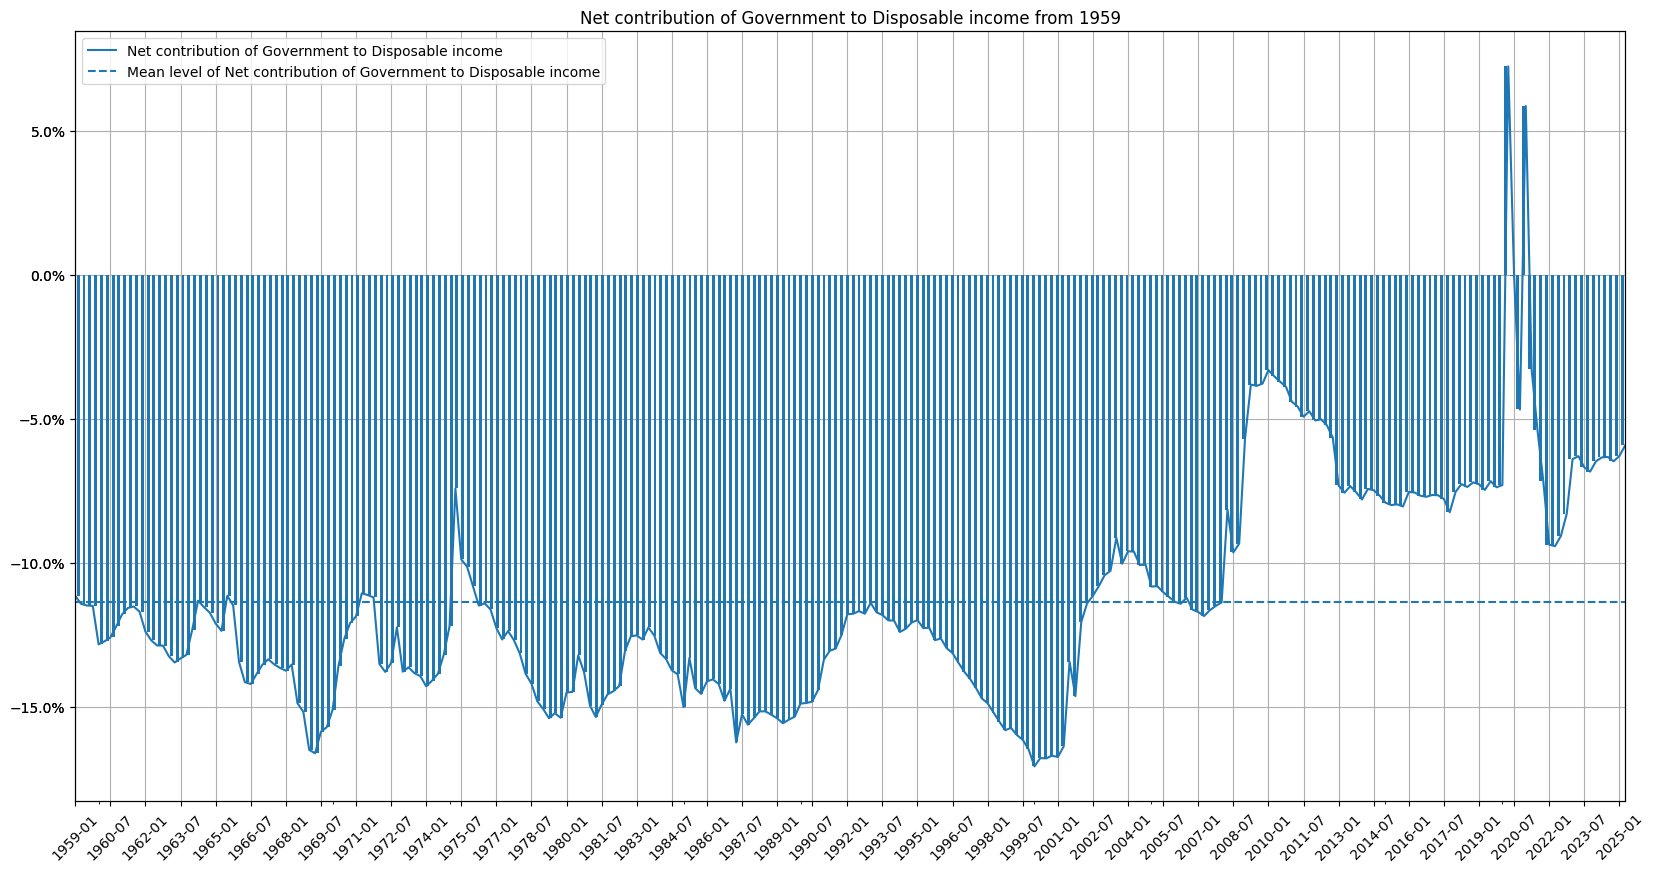

In [6]:
idx = data.columns.get_loc(SOCIAL_BENEFITS_TO_DISPOSABLE_INCOME)
ax = data_quarterly.iloc[:,idx].plot(figsize=(20,10), grid=True,
                                     title=SOCIAL_BENEFITS_TO_DISPOSABLE_INCOME + ' from %d' % data_quarterly.index[0].year,
                                     xticks=data_quarterly.index[::6], xlabel='', rot=45)
ax2 = ax.twiny()
data_quarterly.iloc[:,idx].plot.bar(ax=ax2, xlabel='', legend=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.axhline(y=data.iloc[:,idx].mean(), ls='--', c='#1f77b4', label=MEAN_LEVEL_OF_SOCIAL_BENEFITS_TO_DISPOSABLE_INCOME)
ax.legend()
ax2.xaxis.set_major_locator(mtick.NullLocator())
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, data_quarterly.index[::6])))

In [7]:
print(f"Mean level of Government's net contribution to disposable income since {data.index[0]:%Y-%m-%d}: {data.iloc[:,idx].mean():.2%}")

Mean level of Government's net contribution to disposable income since 1959-01-01: -11.36%


The support US government provided during the Covid pandemic was truly unprecedented&mdash;the government was giving far more than collecting through taxes or contributions. The cost is [the increase of public debt to GDP by about 20%](./Fed_Public_Debt_and_Fed_Tax_Revenue.ipynb)...

### Real disposable income per capita
The question of whether the real disposable personal income per capita is growing or not is a vital economic indicator that signals changes in the standard of living. In the below graph I depict it using chained 2017 USD.

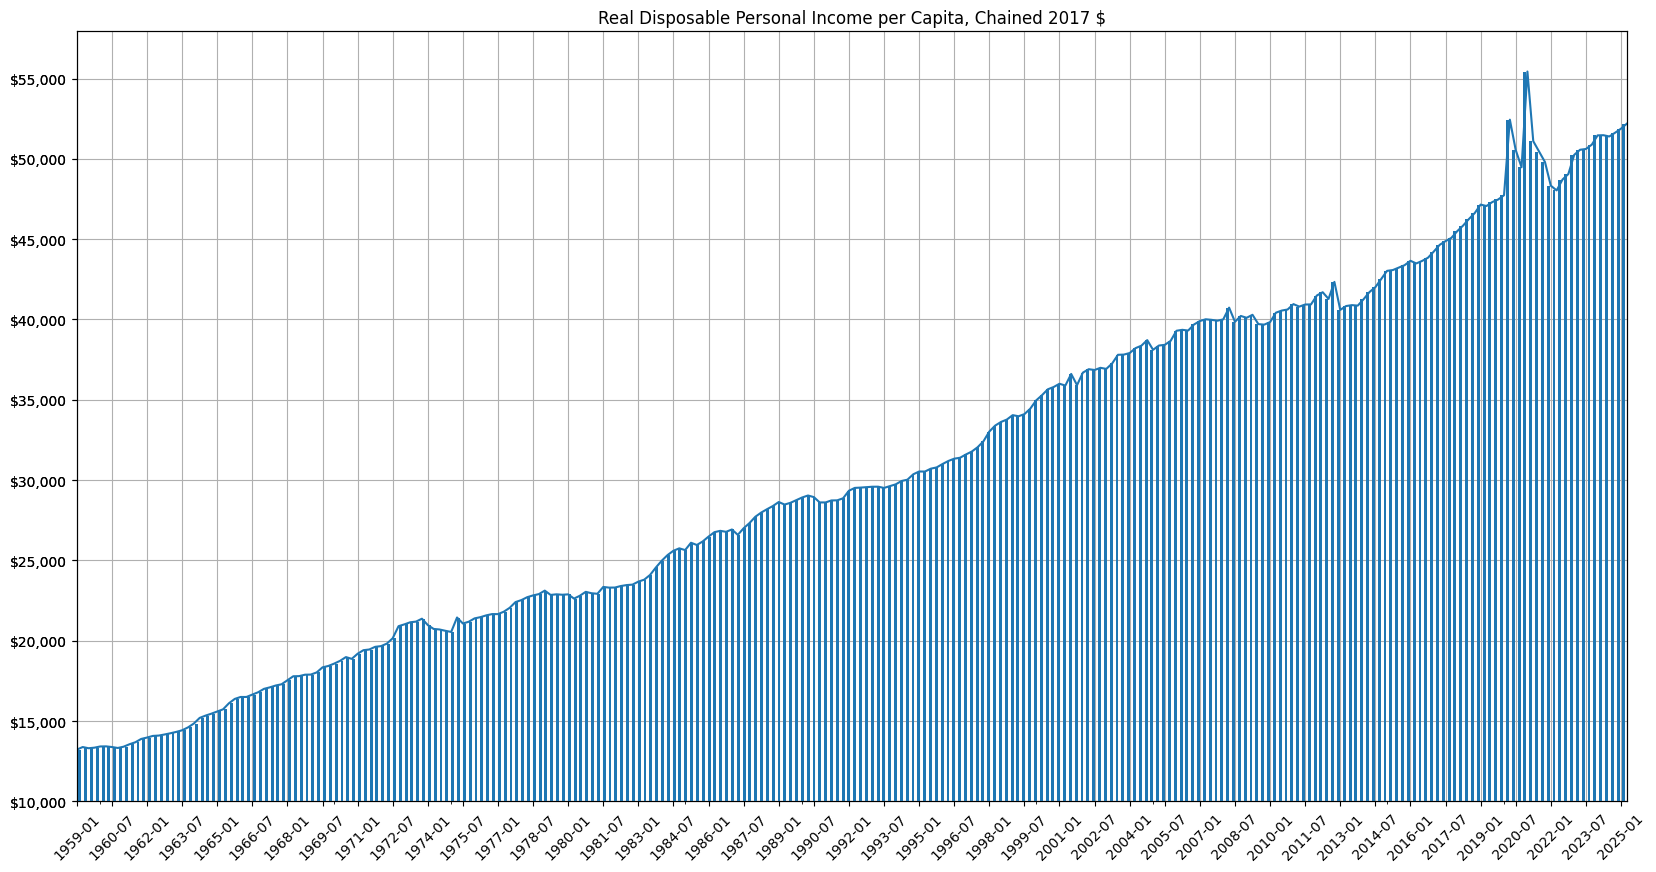

In [8]:
idx = 0
y_step = int(5e3)
y_max = int(data_quarterly.iloc[:,idx].max())
ax = data_quarterly.iloc[:,idx].plot(figsize=(20,10), grid=True,
                                     title=REAL_DISPOSABLE_INCOME + ', Chained 2017 $',
                                     xticks=data_quarterly.index[::6], xlabel='', rot=45,
                                     yticks=range(2 * y_step, y_max, y_step),
                                     ylim=(2 * y_step, y_max + y_step / 2))
ax2 = ax.twiny()
data_quarterly.iloc[:,idx].plot.bar(ax=ax2, xlabel='', legend=False)
ax.yaxis.set_major_formatter('${x:,.0f}')
ax2.xaxis.set_major_locator(mtick.NullLocator())
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, data_quarterly.index[::6])))

#### Annual growth rate of real disposable income per capita
Let's look at the annual growth rate of real disposable income per capita.

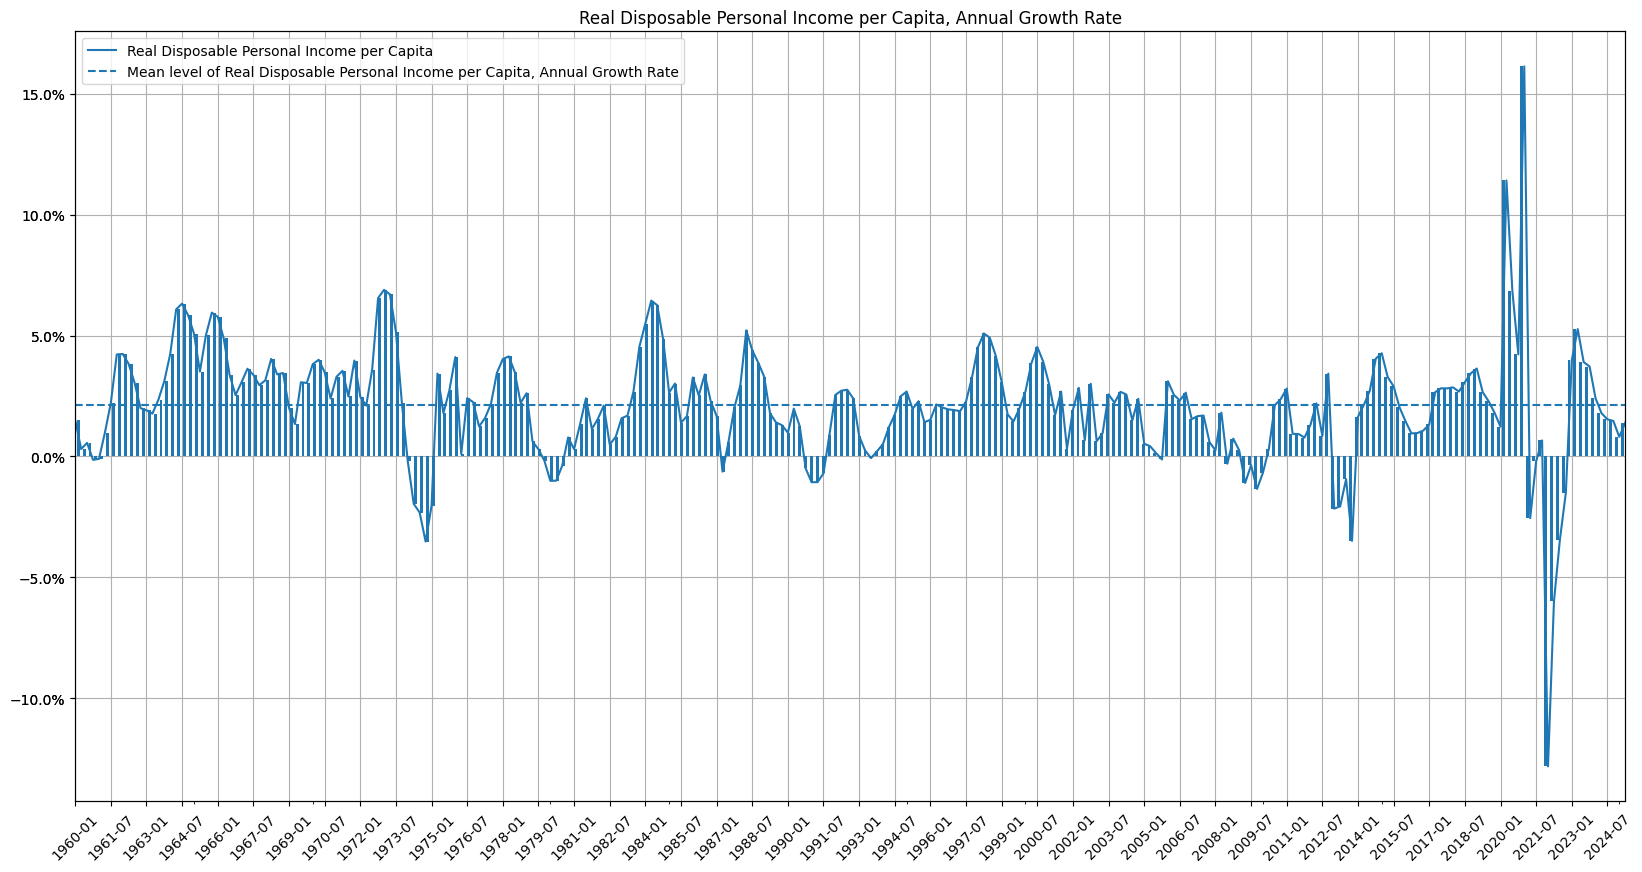

In [9]:
# Quarterly frequency
pi_growth = data_quarterly.iloc[:,idx].pct_change(4).dropna()
ax = pi_growth.plot(figsize=(20,10), grid=True,
                    title=REAL_DISPOSABLE_INCOME_GROWTH_GRAPH_TITLE,
                    xticks=pi_growth.index[::6], xlabel='', rot=45)
ax2 = ax.twiny()
pi_growth.plot.bar(ax=ax2, xlabel='', legend=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.axhline(y=pi_growth.mean(), ls='--', c='#1f77b4', label=MEAN_LEVEL_OF_REAL_DISPOSABLE_INCOME_GROWTH)
ax.legend()
ax2.xaxis.set_major_locator(mtick.NullLocator())
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, pi_growth.index[::6])))

In [10]:
print(f'Mean level of real disposable income per capita growth rate since {pi_growth.index[0]:%Y-%m-%d}: {pi_growth.mean():.2%}')
print(f'The current level is {pi_growth.iloc[-1] - pi_growth.mean():+.2%} vs the mean')

Mean level of real disposable income per capita growth rate since 1960-01-01: 2.12%
The current level is -0.73% vs the mean


The mean level of annual growth of real disposable income per capita is actually lower than [the average annual growth of US real GDP](./GDP_Composition.ipynb), which is 2.7%.

### Savings rate
Personal saving as a percentage of disposable personal income (DPI), frequently referred to as "the personal saving rate" is calculated as the ratio of personal saving to DPI. Personal saving is equal to personal income less personal outlays and personal taxes; it may generally be viewed as the portion of personal income that is used either to provide funds to capital markets or to invest in real assets such as residences.

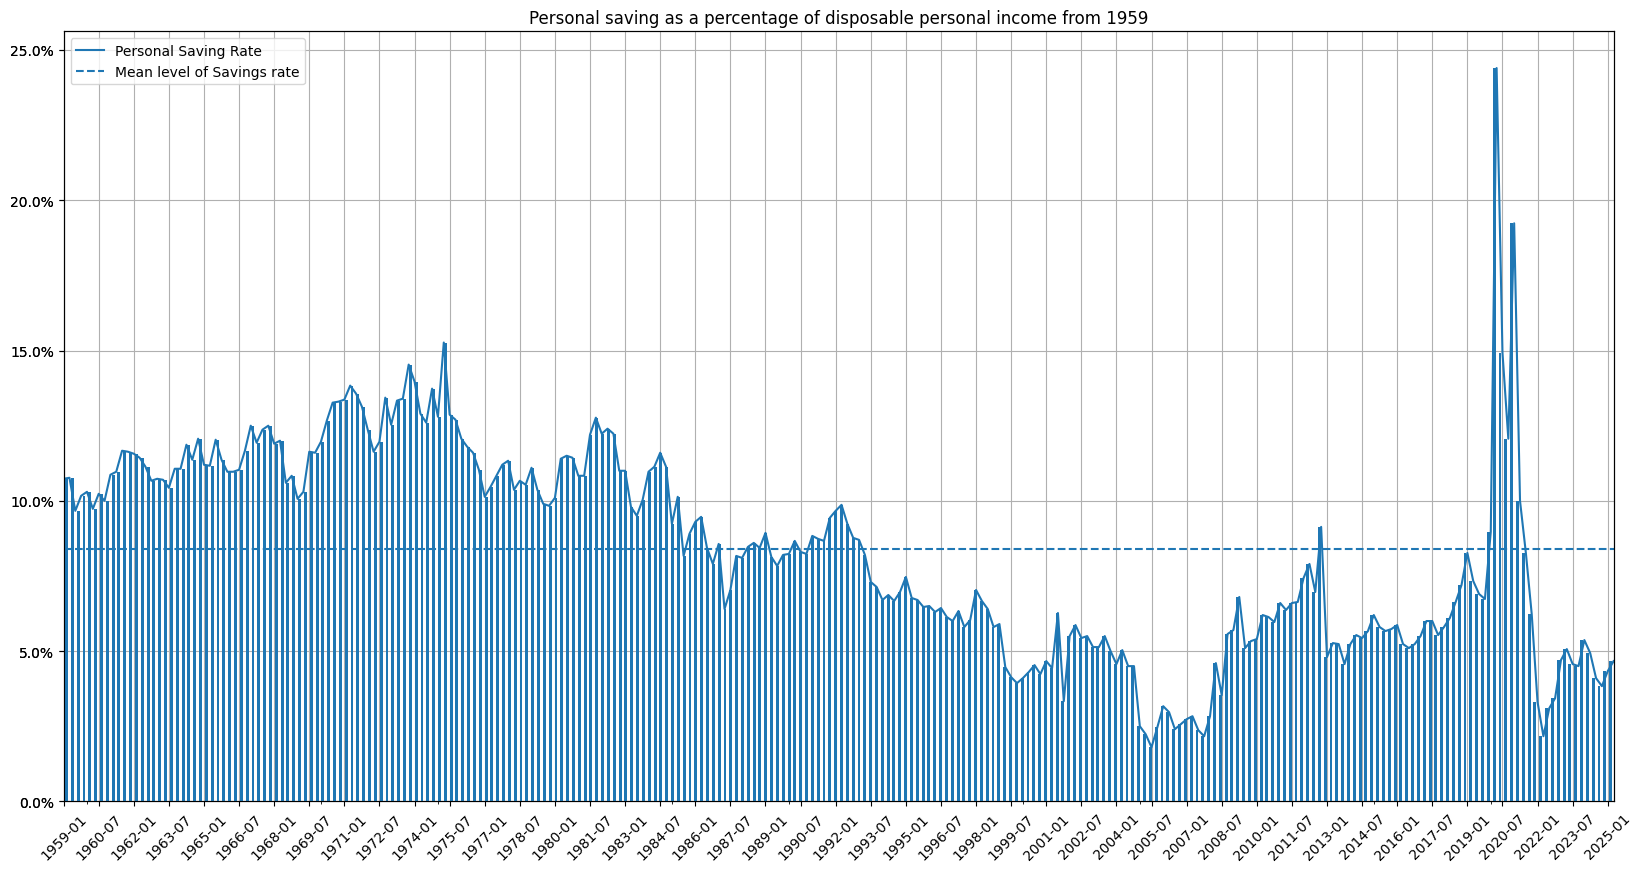

In [11]:
idx = data.columns.get_loc(PSR)
ax = data_quarterly.iloc[:,idx].plot(figsize=(20,10), grid=True,
                                     title=SAVINGS_RATE_GRAPH_TITLE + ' from %d' % data_quarterly.index[0].year,
                                     xticks=data_quarterly.index[::6], xlabel='', rot=45)
ax2 = ax.twiny()
data_quarterly.iloc[:,idx].plot.bar(ax=ax2, xlabel='', legend=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.axhline(y=data.iloc[:,idx].mean(), ls='--', c='#1f77b4', label=MEAN_LEVEL_OF_SAVINGS_RATE)
ax.legend()
ax2.xaxis.set_major_locator(mtick.NullLocator())
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, data_quarterly.index[::6])))

In [12]:
print(f'Mean level of savings rate since {data.index[0]:%Y-%m-%d}: {data.iloc[:,idx].mean():.2%}')
print(f'The current level is {data.iloc[-1,idx]-data.iloc[:,idx].mean():+.2%} vs the mean')

Mean level of savings rate since 1959-01-01: 8.39%
The current level is -3.89% vs the mean


### Percentage of disposable personal income spent on paying nonmortgage interest and on consumption
How could it be that real disposable personal income is not decreasing while the savings rate is? Let's look at what percentage of disposable income nonmortgage interest payments<sup>1</sup> (such as interest on consumer loands or credit cards) make up and what percentage is spent on personal consumption (including rent).

[1] Mortgage interest payments are accounted for directly in personal income, therefore higher mortgage interest payments reduce DPI.

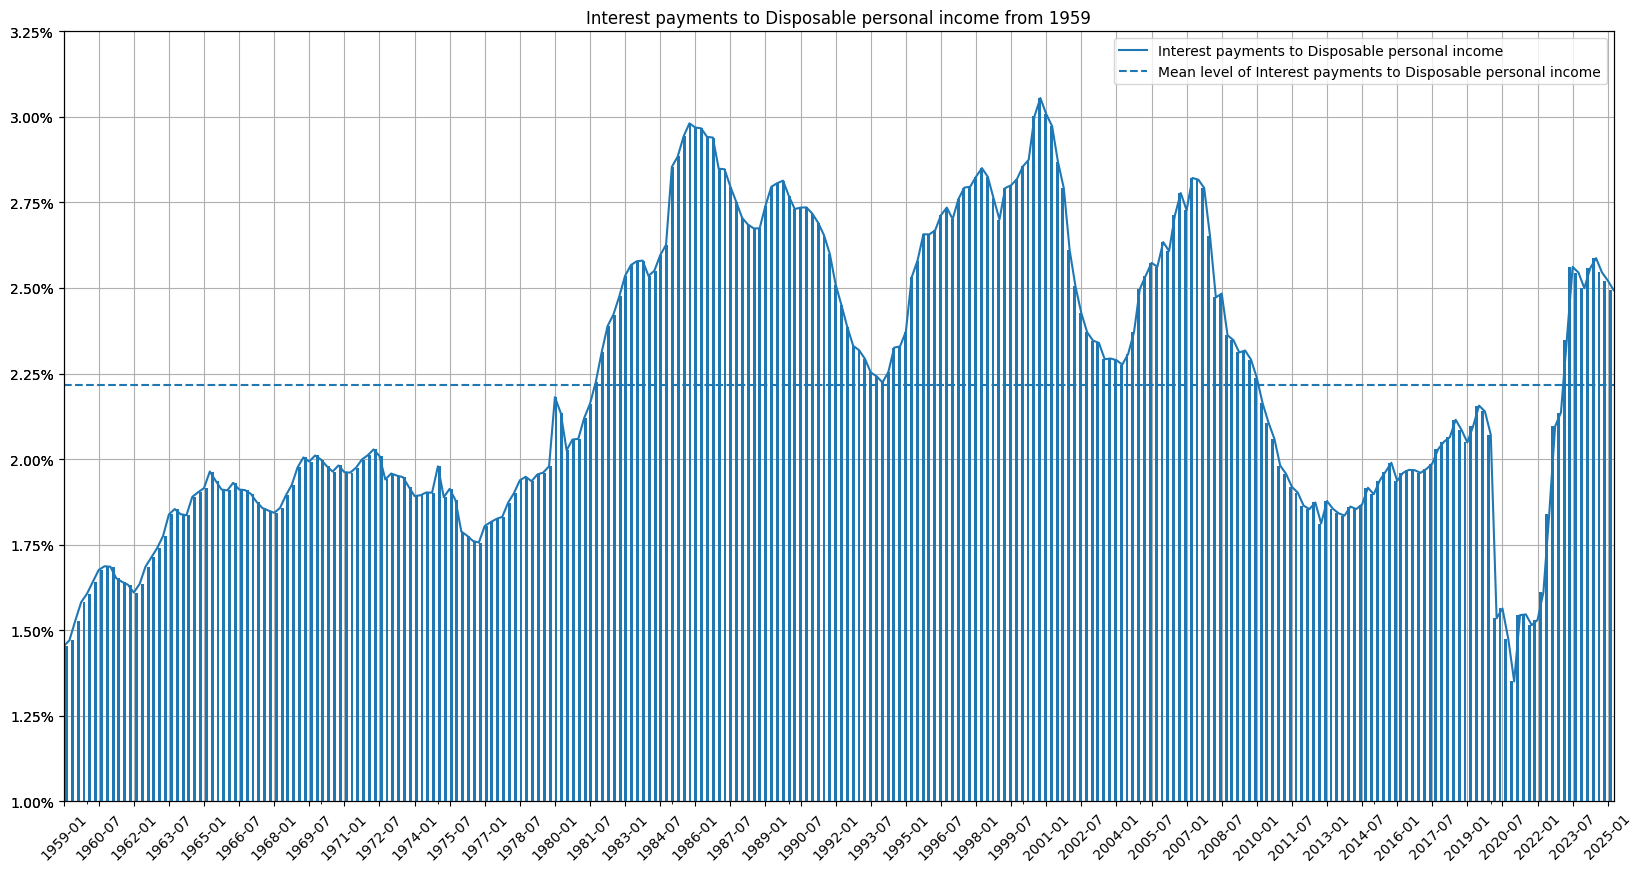

In [13]:
idx = data.columns.get_loc(INTEREST_PAYMENTS_TO_DPI)
y_step = .0025
y_max = data_quarterly.iloc[:,idx].max()
y_max = y_max + y_step - y_max % y_step
ax = data_quarterly.iloc[:,idx].plot(figsize=(20,10), grid=True,
                                     title=INTEREST_PAYMENTS_TO_DPI + ' from %d' % data_quarterly.index[0].year,
                                     xticks=data_quarterly.index[::6], xlabel='', rot=45, ylim=(.01, y_max))
ax2 = ax.twiny()
data_quarterly.iloc[:,idx].plot.bar(ax=ax2, xlabel='', legend=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.axhline(y=data.iloc[:,idx].mean(), ls='--', c='#1f77b4', label=MEAN_LEVEL_OF_INTEREST_PAYMENTS_TO_DPI)
ax.legend()
ax2.xaxis.set_major_locator(mtick.NullLocator())
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, data_quarterly.index[::6])))

In [14]:
print(f'Mean level of Interest payments to DPI since {data.index[0]:%Y-%m-%d}: {data.iloc[:,idx].mean():.2%}')
print(f'The current level is {data.iloc[-1,idx] - data.iloc[:,idx].mean():+.2%} vs the mean')

Mean level of Interest payments to DPI since 1959-01-01: 2.22%
The current level is +0.27% vs the mean


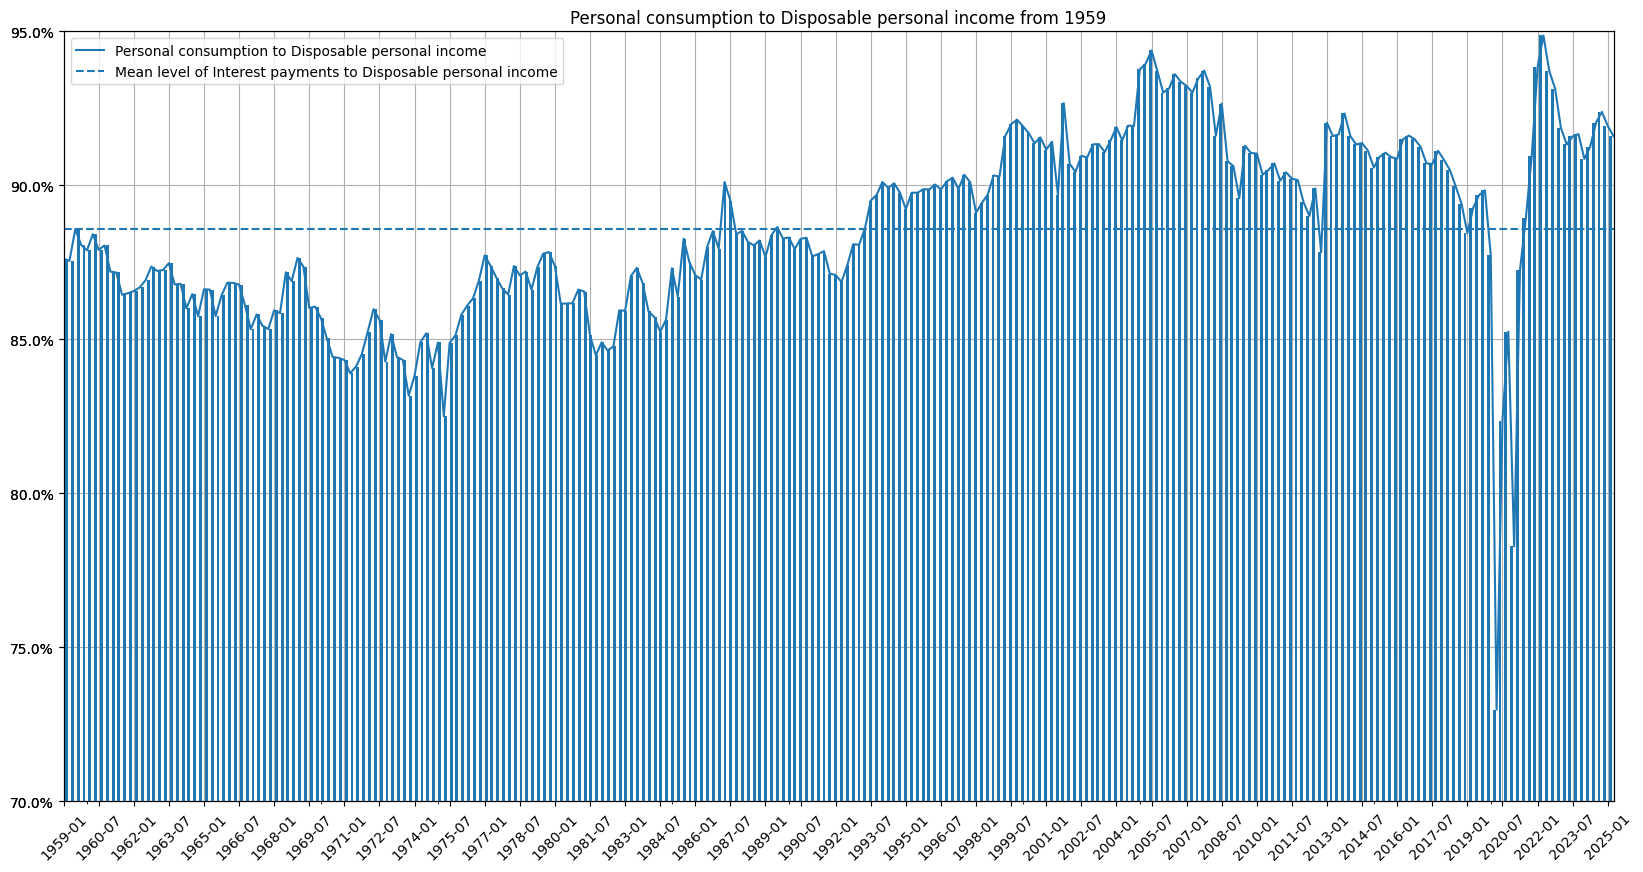

In [15]:
idx = data.columns.get_loc(PCE_TO_DPI)
y_step = .025
y_max = data_quarterly.iloc[:,idx].max()
y_max = y_max + y_step - y_max % y_step
ax = data_quarterly.iloc[:,idx].plot(figsize=(20,10), grid=True,
                                     title=PCE_TO_DPI + ' from %d' % data_quarterly.index[0].year,
                                     xticks=data_quarterly.index[::6], xlabel='', rot=45, ylim=(.7, y_max))
ax2 = ax.twiny()
data_quarterly.iloc[:,idx].plot.bar(ax=ax2, xlabel='', legend=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.axhline(y=data.iloc[:,idx].mean(), ls='--', c='#1f77b4', label=MEAN_LEVEL_OF_INTEREST_PAYMENTS_TO_DPI)
ax.legend()
ax2.xaxis.set_major_locator(mtick.NullLocator())
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, data_quarterly.index[::6])))

In [16]:
print(f'Mean level of PCE to DPI since {data.index[0]:%Y-%m-%d}: {data.iloc[:,idx].mean():.2%}')
print(f'The current level is {data.iloc[-1,idx] - data.iloc[:,idx].mean():+.2%} vs the mean')

Mean level of PCE to DPI since 1959-01-01: 88.58%
The current level is +3.20% vs the mean


**Conclusion**: Increased non-mortgage interest payments and higher consumption than the average explain the most part of the lower savings rate.

### Percentage of disposable personal income spent on mortgage debt service payments
This measure is provied by the Fed rather than by the BEA. It includes both mortgage interest payments as well as paying down the principle. The way the Fed calculates it uses different methodology from the BEA.

In [17]:
SERIES_NAME = 'Mortgage Debt Service Payments to DPI'
data_fed = web.get_data_fred('MDSP', report_start, report_end).iloc[:,0] / 100.
_ = data_fed.rename(SERIES_NAME, inplace=True)

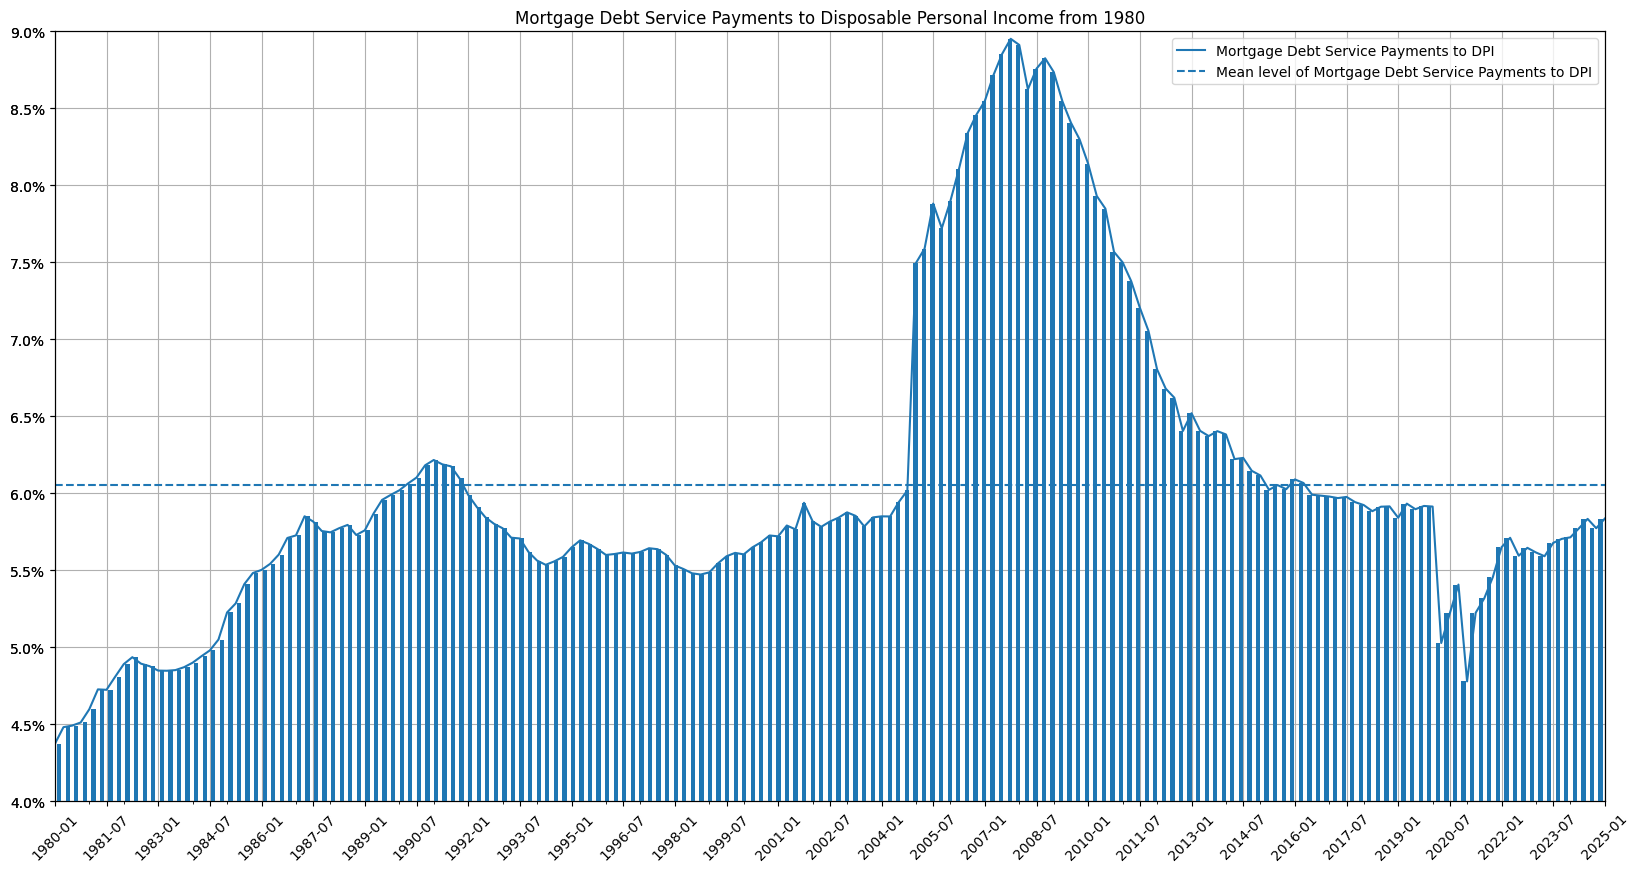

In [18]:
y_step = .0025
y_max = data_fed.max()
y_max = y_max + y_step - y_max % y_step
ax = data_fed.plot(figsize=(20,10), grid=True,
                   title=MORTGAGE_DEBT_SERVICE_TO_DPI + ' from %d' % data_fed.index[0].year,
                   xticks=data_fed.index[::6], xlabel='', rot=45, ylim=(.04, y_max), yticks=np.arange(.04, y_max, y_step * 2))
ax2 = ax.twiny()
data_fed.plot.bar(ax=ax2, xlabel='', legend=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.axhline(y=data_fed.mean(), ls='--', c='#1f77b4', label=MEAN_LEVEL_OF + SERIES_NAME)
ax.legend()
ax2.xaxis.set_major_locator(mtick.NullLocator())
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, data_fed.index[::6])))